In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import hdbscan

from sklearn.cluster import OPTICS, DBSCAN

%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha': 0.5, 's': 80, 'linewidths': 0}

In [15]:
test_data = pd.read_csv('09-Woogue_Mall_Customers.csv', encoding='Latin-1') 
test_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
test_data = test_data.iloc[:,[3,4]].values

In [ ]:
# test_data

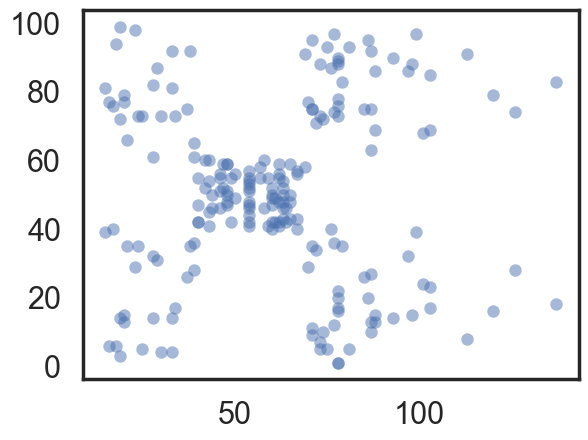

In [18]:
plt.scatter(test_data[:,0], test_data[:,1], color='b', **plot_kwds)

In [39]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=9, gen_min_span_tree=True)
clusterer.fit(test_data)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=3)

<Axes: >

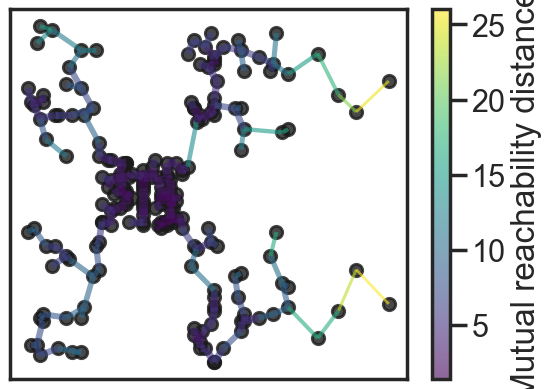

In [40]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

<Axes: ylabel='$\\lambda$ value'>

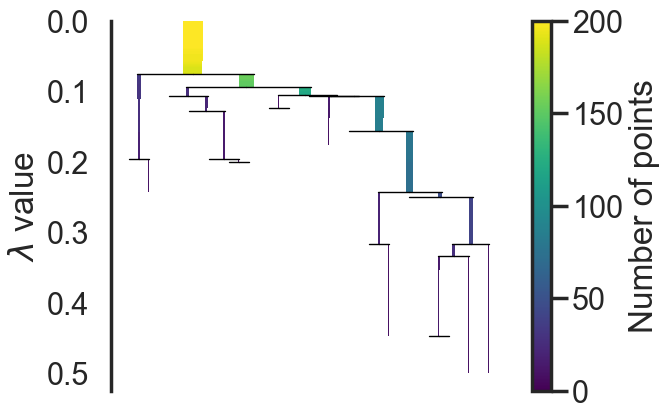

In [41]:
clusterer.condensed_tree_.plot()

<Axes: ylabel='$\\lambda$ value'>

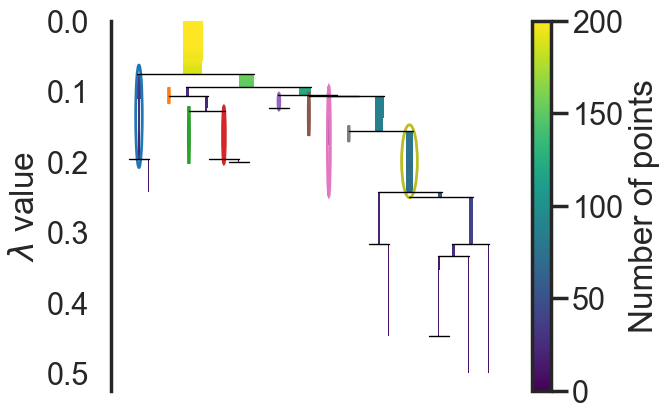

In [42]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

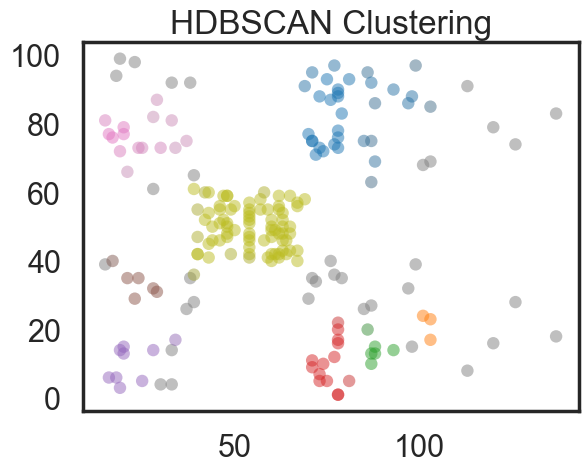

In [43]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)
plt.title("HDBSCAN Clustering")
plt.show()

## Discussion
### Cluster Size:
1. 3 - They are underfit as they fail to capture underlying patterns in the data.
2. 5 - It seems the data is more accustomed to having 5 clusters.
3. 9 - They become more overfit capturing noise instead of meaningfull patterns

### Clustering Algorithms

In [3]:
df = pd.read_csv('09-Woogue_cereal_activity.csv')
df.head()

,Unnamed: 0,name,calories,carbo,sugars
0,0,100% Bran,70,5.0,6
1,1,100% Natural Bran,120,8.0,8
2,2,All-Bran,70,7.0,5
3,3,All-Bran with Extra Fiber,50,8.0,0
4,4,Almond Delight,110,14.0,8


In [4]:
df = df.iloc[:,[3,4]].values

Text(0.5, 1.0, 'Original Data')

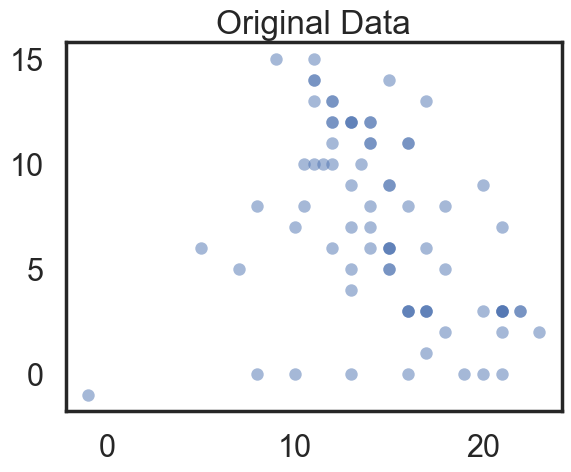

In [6]:
plt.scatter(df[:,0], df[:,1], color='b', **plot_kwds)
plt.title("Original Data")

### DBSCAN

In [17]:
clusterer_dbscan = DBSCAN(eps=0.5, min_samples=3)
clusterer_dbscan.fit(df)

DBSCAN(min_samples=3)

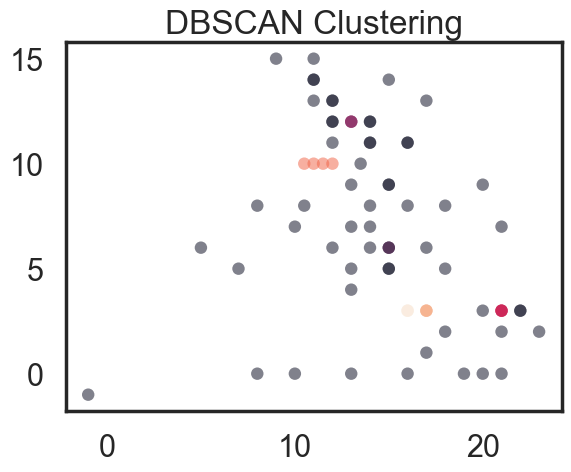

In [18]:
plt.scatter(df[:, 0], df[:, 1], c=clusterer_dbscan.labels_, **plot_kwds)
plt.title("DBSCAN Clustering")
plt.show()

### OPTICS

In [19]:
clusterer_optics = OPTICS(min_samples=3)
clusterer_optics.fit(df)

c:\Users\Ivan\Desktop\School\4th year - 1st sem\4103 intelligent systems\final\Forked from Gerard repo\venv\Lib\site-packages\sklearn\cluster\_optics.py:995: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


OPTICS(min_samples=3)

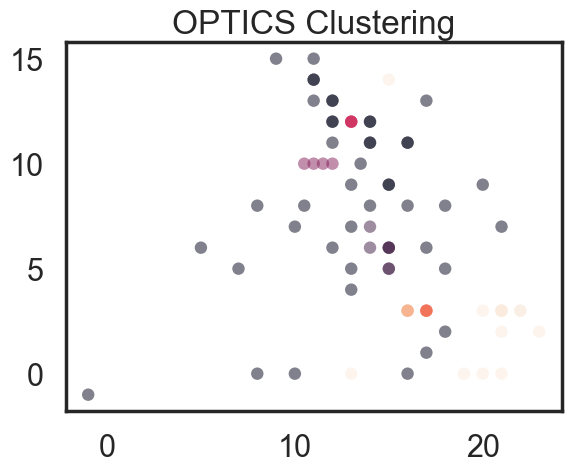

In [20]:
plt.scatter(df[:, 0], df[:, 1], c=clusterer_optics.labels_, **plot_kwds)
plt.title("OPTICS Clustering")
plt.show()

They are both very similar. There are very little difference between them.